In [10]:
import torch
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [11]:
#downloading the datasets,

train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [12]:


image,labels=train_data[0]
image.shape

torch.Size([1, 28, 28])

In [13]:
class_name=train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, '9')

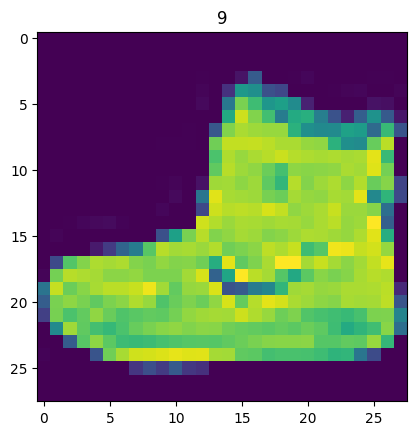

In [14]:
#visualizing the data
import matplotlib.pyplot as plt
plt.imshow(image.squeeze())
plt.title(labels)

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


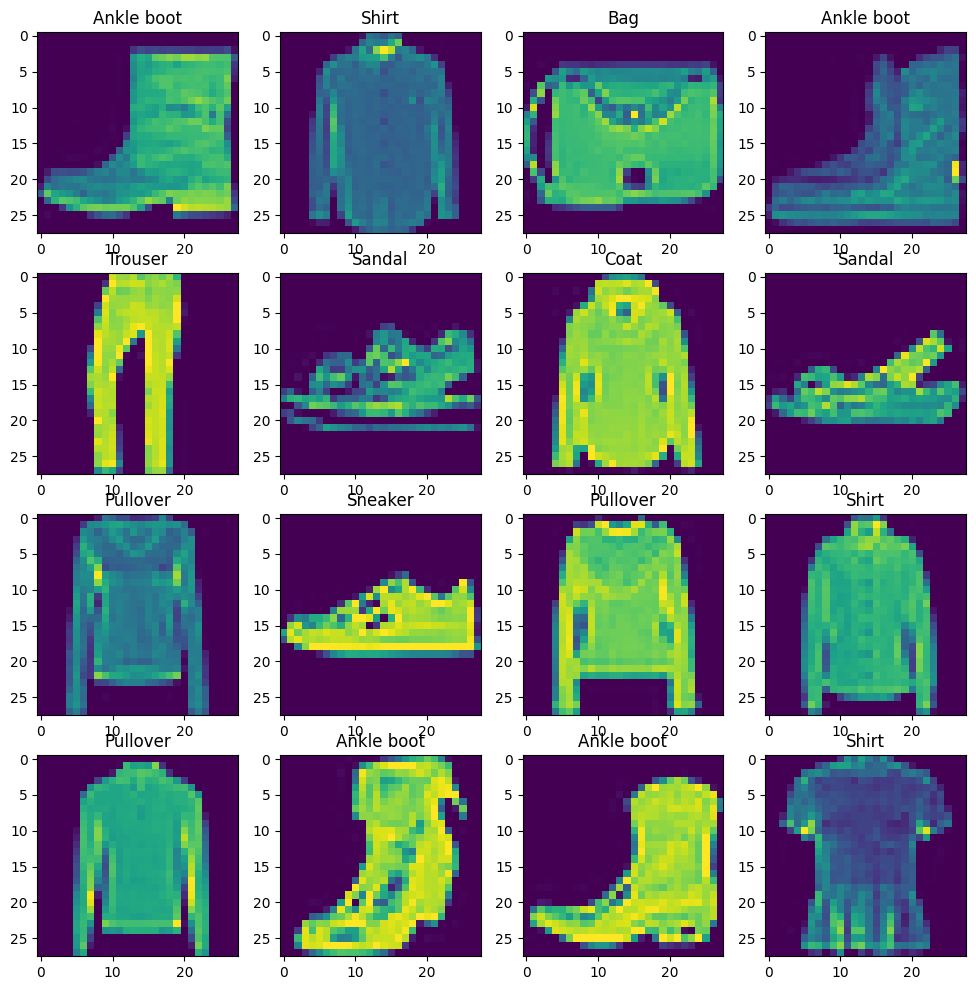

In [15]:
# now lets print more
torch.manual_seed(42)
figure=plt.figure(figsize=(12,12))
raw,col=4,4
for i in range(1,raw*col+1):
  random_integer=torch.randint(0,len(train_data),size=[1]).item()
  figure.add_subplot(raw,col,i)
  print(random_integer)
  img,label=train_data[random_integer]
  plt.imshow(img.squeeze())
  plt.title(class_name[label])

In [17]:
#creating a dataloader
BATCH_SIZE=32

train_data_loader=DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)


test_data_loader=DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [21]:
#creating a model with non linearity
from torch import nn
class vison_v2(nn.Module):
  def __init__(self,in_feature,out_feature,hidden_units):
    super().__init__()
    self.layer=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=in_feature, out_features=hidden_units),
        nn.ReLU(),

        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),

        nn.Linear(in_features=hidden_units, out_features=out_feature),
        nn.ReLU()
    )

  def forward(self,x):
    return self.layer(x)

In [22]:
#assigning the model:
model_1=vison_v2(in_feature=28*28,out_feature=len(class_name), hidden_units=10)


In [24]:
#setting up device
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
#loss and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [25]:
#helper functions

from pathlib import Path
import requests
if Path('helper_functions.py').is_file():
  print("already exsits, skipping download...")

else:
  print('downloading...')
  response=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(response.content)

  print("download complete...")



downloading...
download complete...


In [26]:
from helper_functions import accuracy_fn

In [36]:
#fuctionizing the training and testing loop
def training_loop(model: torch.nn.Module,
                  data_loader: torch.utils.data.DataLoader,
                  loss_fn: torch.nn.Module,
                  optimizer:torch.optim.Optimizer,
                  accuracy_fn,
                  device: torch.device=device):

  train_loss,train_acc=0,0
  model.to(device)
  for batch,(X,y) in enumerate(data_loader):
    X,y=X.to(device),y.to(device)


    #forward pass
    y_pred=model(X)

    #loss and accuracy
    loss=loss_fn(y_pred,y)
    train_loss=train_loss+loss
    accuracy=accuracy_fn(y,y_pred.argmax(dim=1))
    train_acc=train_acc+accuracy

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
  train_loss=train_loss/len(data_loader)

  train_acc=train_acc/len(data_loader)

  print(f"train loss: {train_loss:.5f} | train accuracy: {train_acc}")


def testing_loop(model: torch.nn.Module,
                 data_loader: torch.utils.data.DataLoader,
                 loss_fn:torch.nn.Module
                 ,accuracy_fn,
                 device: torch.device = device):

  test_loss,test_acc=0,0
  model.to(device)
  model.add_module
  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.to(device),y.to(device)

      test_pred=model(X)

      loss=loss_fn(test_pred,y)
      test_loss=test_loss+loss
      accuracy=accuracy_fn(y,test_pred.argmax(dim=1))
      test_acc=test_acc+accuracy

    test_loss=test_loss/len(data_loader)
    test_acc=test_acc/len(data_loader)

    print(f'test loss: {test_loss:.5f} | test accuracy: {test_acc:.5f}')

In [37]:
#setting timer
from timeit import default_timer as timer
def time(start:int, end: int):
  total_time=end-start
  print(f'total time taken: {total_time}')
  return total_time

In [38]:
# making the evaluation loop

def evaluation(model: torch.nn.Module,
                 data_loader: torch.utils.data.DataLoader,
                 loss_fn:torch.nn.Module
                 ,accuracy_fn,
                 device: torch.device = device):
  total_loss,total_acc=0,0
  model.to(device)
  model.add_module
  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.to(device),y.to(device)

      test_pred=model(X)

      loss=loss_fn(test_pred,y)
      total_loss=total_loss+loss
      accuracy=accuracy_fn(y,test_pred.argmax(dim=1))
      total_acc=total_acc+accuracy

    total_loss=total_loss/len(data_loader)
    total_acc=total_acc/len(data_loader)

    # print(f'test loss: {total_loss:.5f} | test accuracy: {total_acc:.5f}')
  return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": total_loss.item(),
            "model_acc": total_acc}

In [ ]:
#now lets start cooking
